# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [3]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

In [4]:
!pip install torchvision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 182.3 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 123.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 287.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 179.4 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.0/21.0 MB 219.5 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 217.6 MB/s eta 0:00:0000:0100:01


In [7]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
from sagemaker.pytorch import PyTorch
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)

from sagemaker.debugger import (
    Rule,
    DebuggerHookConfig,
    ProfilerRule,
    rule_configs,
    ProfilerConfig,
    FrameworkProfile
)
import sagemaker
import boto3
from sagemaker.debugger import (
    Rule,
    DebuggerHookConfig,
    rule_configs,
)
from sagemaker.debugger import Rule, ProfilerRule, rule_configs, ProfilerConfig, FrameworkProfile, CollectionConfig
import torchvision 
import torchvision.transforms as transforms

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [5]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
#!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!aws s3 cp s3://udacity-aind/dog-project/dogImages.zip ./ 
!unzip dogImages.zip

download: s3://udacity-aind/dog-project/dogImages.zip to ./dogImages.zip
Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00047.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00048.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00058.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00071.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00078.jpg  
   creating: dogImages/test/002.Afghan_hound/
  inflating: dogImages/test/002.Afghan_hound/Afghan_hound_00116.jpg  
  inflating: dogImages/test/002.Afghan_hound/Afghan

In [8]:

session = sagemaker.Session()
#session = boto3.session.Session()

bucket = session.default_bucket()
print("Default Bucket: {}".format(bucket))

region = session.boto_region_name
print("AWS Region: {}".format(region))

role = sagemaker.get_execution_role()
print("RoleArn: {}".format(role))



bucket_path = f"s3://{bucket}/dogImages"
print(bucket_path)

s3_output_location = f"s3://{bucket}/models/image_model"


Default Bucket: sagemaker-us-east-1-880024414046
AWS Region: us-east-1
RoleArn: arn:aws:iam::880024414046:role/service-role/AmazonSageMaker-ExecutionRole-20230320T182853
s3://sagemaker-us-east-1-880024414046/dogImages


In [13]:
#upload dataset to s3

!aws s3 sync ./dogImages/ {bucket_path}

upload: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg to s3://sagemaker-us-east-1-880024414046/dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00058.jpg to s3://sagemaker-us-east-1-880024414046/dogImages/test/001.Affenpinscher/Affenpinscher_00058.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00048.jpg to s3://sagemaker-us-east-1-880024414046/dogImages/test/001.Affenpinscher/Affenpinscher_00048.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00078.jpg to s3://sagemaker-us-east-1-880024414046/dogImages/test/001.Affenpinscher/Affenpinscher_00078.jpg
upload: dogImages/test/002.Afghan_hound/Afghan_hound_00146.jpg to s3://sagemaker-us-east-1-880024414046/dogImages/test/002.Afghan_hound/Afghan_hound_00146.jpg
upload: dogImages/test/002.Afghan_hound/Afghan_hound_00141.jpg to s3://sagemaker-us-east-1-880024414046/dogImages/test/002.Afghan_hound/Afghan_hound_00141.jpg
upload: dogImages/test/002.Afg

In [9]:
# Data channel

data_channels = {
    "train": f"s3://{bucket}/dogImages/train/",
    "valid": f"s3://{bucket}/dogImages/valid/",
    "test": f"s3://{bucket}/dogImages/test/",
}


## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [10]:

#TODO: Declare your HP ranges, metrics etc.
hyperparameter_ranges = {
    "lr": ContinuousParameter(0.001, 0.1),
    "momentum": ContinuousParameter(0.0, 1.0),
    "batch-size": CategoricalParameter([32, 64, 128, 256]),
}
objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Testing Loss: ([0-9\\.]+)"}]

In [11]:

#TODO: Create estimators for your HPs

estimator = PyTorch(
    entry_point="hpo.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.2xlarge"
)

tuner =  HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=2,
    objective_type=objective_type,
)

In [12]:

# TODO: Fit your HP Tuner
tuner.fit(data_channels, wait=True) # TODO: Remember to include your data channels

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


............................................................................................................................................................................................!


In [13]:
# TODO: Get the best estimators and the best HPs
best_estimator = tuner.best_estimator()
#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2023-04-09 03:17:35 Starting - Preparing the instances for training
2023-04-09 03:17:35 Downloading - Downloading input data
2023-04-09 03:17:35 Training - Training image download completed. Training in progress.
2023-04-09 03:17:35 Uploading - Uploading generated training model
2023-04-09 03:17:35 Completed - Resource reused by training job: pytorch-training-230409-0308-003-4549a880


{'_tuning_objective_metric': '"average test loss"',
 'batch-size': '"64"',
 'lr': '0.017347296140063206',
 'momentum': '0.6087771526396725',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2023-04-09-03-08-44-699"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-880024414046/pytorch-training-2023-04-09-03-08-44-699/source/sourcedir.tar.gz"'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [23]:


# TODO: Set up debugging and profiling rules and hooks

rules = [
    Rule.sagemaker(base_config=rule_configs.loss_not_decreasing(),
             rule_parameters={"tensor_regex": "CrossEntropyLoss_output_0",
                             "mode": "TRAIN"}),
    ProfilerRule.sagemaker(rule_configs.LowGPUUtilization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
]


debugger_config = DebuggerHookConfig(
    collection_configs=[
        CollectionConfig(
                name="custom_collection",
                parameters={ "include_regex": "CrossEntropyLoss_output.*",
                             "train.save_interval": "1",
                             "eval.save_interval": "5"
                           })
    ]
)

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10)
)

See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [24]:
best_lr = best_estimator.hyperparameters()['lr']
best_batch_size = eval(best_estimator.hyperparameters()['batch-size'])
best_momentum = best_estimator.hyperparameters()['momentum']

hyperparameters = {'batch-size':best_batch_size, 'lr':best_lr, 'momentum': best_momentum}
print(hyperparameters)

{'batch-size': '64', 'lr': '0.017347296140063206', 'momentum': '0.6087771526396725'}


In [29]:


hyperparameters = {'batch-size':best_batch_size, "gpu": True, "epochs": 15, 'lr':best_lr, 'momentum': best_momentum}

estimator = PyTorch(
    entry_point="train_model.py",
    base_job_name="dogImage-model-training",
    role=role,
    instance_count=1,
    # instance_type
    instance_type="ml.g4dn.xlarge",
    hyperparameters=hyperparameters,
    framework_version="1.8",
    py_version="py36",
    
    rules=rules,
    debugger_hook_config=debugger_config,
    profiler_config=profiler_config,
    output_path=s3_output_location,
)

In [30]:
data_channels = {
    "train": f"s3://{bucket}/dogImages/train/",
    "valid": f"s3://{bucket}/dogImages/valid/",
    "test": f"s3://{bucket}/dogImages/test/",
}

estimator.fit(data_channels, wait=True)

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: dogImage-model-training-2023-04-09-03-52-50-348


2023-04-09 03:52:51 Starting - Starting the training job...
2023-04-09 03:53:22 Starting - Preparing the instances for trainingLossNotDecreasing: InProgress
VanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
LowGPUUtilization: InProgress
ProfilerReport: InProgress
...
2023-04-09 03:53:57 Downloading - Downloading input data......
2023-04-09 03:54:58 Training - Downloading the training image...............
2023-04-09 03:57:28 Training - Training image download completed. Training in progress...bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2023-04-09 03:57:37,627 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2023-04-09 03:57:37,661 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2023-04-09 03:57:37,664 sagemaker_pytorch_container.training INFO     Invoking user training script.


In [31]:
job_name = estimator.latest_training_job.name
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=estimator.latest_training_job.name)
description

{'TrainingJobName': 'dogImage-model-training-2023-04-09-03-52-50-348',
 'TrainingJobArn': 'arn:aws:sagemaker:us-east-1:880024414046:training-job/dogImage-model-training-2023-04-09-03-52-50-348',
 'ModelArtifacts': {'S3ModelArtifacts': 's3://sagemaker-us-east-1-880024414046/models/image_model/dogImage-model-training-2023-04-09-03-52-50-348/output/model.tar.gz'},
 'TrainingJobStatus': 'Completed',
 'SecondaryStatus': 'Completed',
 'HyperParameters': {'batch-size': '"64"',
  'epochs': '15',
  'gpu': 'true',
  'lr': '"0.017347296140063206"',
  'momentum': '"0.6087771526396725"',
  'sagemaker_container_log_level': '20',
  'sagemaker_job_name': '"dogImage-model-training-2023-04-09-03-52-50-348"',
  'sagemaker_program': '"train_model.py"',
  'sagemaker_region': '"us-east-1"',
  'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-880024414046/dogImage-model-training-2023-04-09-03-52-50-348/source/sourcedir.tar.gz"'},
 'AlgorithmSpecification': {'TrainingImage': '763104351884.dkr.ecr.us-ea

In [32]:
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

trial = create_trial(estimator.latest_job_debugger_artifacts_path())
trial.tensor_names()


[2023-04-09 04:12:14.257 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:35 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2023-04-09 04:12:14.289 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:35 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-880024414046/models/image_model/dogImage-model-training-2023-04-09-03-52-50-348/debug-output
[2023-04-09 04:12:15.131 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:35 WARNING s3handler.py:183] Encountered the exception An error occurred while reading from response stream: ('Connection broken: IncompleteRead(0 bytes read, 235 more expected)', IncompleteRead(0 bytes read, 235 more expected)) while reading s3://sagemaker-us-east-1-880024414046/models/image_model/dogImage-model-training-2023-04-09-03-52-50-348/debug-output/index/000000000/000000000215_worker_0.json . Will retry now
[2023-04-09 04:12:31.559 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:35 INFO trial

['CrossEntropyLoss_output_0',
 'gradient/ResNet_fc.0.bias',
 'gradient/ResNet_fc.0.weight',
 'gradient/ResNet_fc.2.bias',
 'gradient/ResNet_fc.2.weight',
 'gradient/ResNet_fc.4.bias',
 'gradient/ResNet_fc.4.weight',
 'layer1.0.relu_input_0',
 'layer1.0.relu_input_1',
 'layer1.0.relu_input_2',
 'layer1.1.relu_input_0',
 'layer1.1.relu_input_1',
 'layer1.1.relu_input_2',
 'layer1.2.relu_input_0',
 'layer1.2.relu_input_1',
 'layer1.2.relu_input_2',
 'layer2.0.relu_input_0',
 'layer2.0.relu_input_1',
 'layer2.0.relu_input_2',
 'layer2.1.relu_input_0',
 'layer2.1.relu_input_1',
 'layer2.1.relu_input_2',
 'layer2.2.relu_input_0',
 'layer2.2.relu_input_1',
 'layer2.2.relu_input_2',
 'layer2.3.relu_input_0',
 'layer2.3.relu_input_1',
 'layer2.3.relu_input_2',
 'layer3.0.relu_input_0',
 'layer3.0.relu_input_1',
 'layer3.0.relu_input_2',
 'layer3.1.relu_input_0',
 'layer3.1.relu_input_1',
 'layer3.1.relu_input_2',
 'layer3.2.relu_input_0',
 'layer3.2.relu_input_1',
 'layer3.2.relu_input_2',
 'la

In [33]:
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.TRAIN)))
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.EVAL)))

1575
43


In [34]:
def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    print(f"[INFO] Getting data in {len(steps)} steps")
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
        print(".", end="")
    return steps, vals

[INFO] Getting data in 1575 steps
......................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

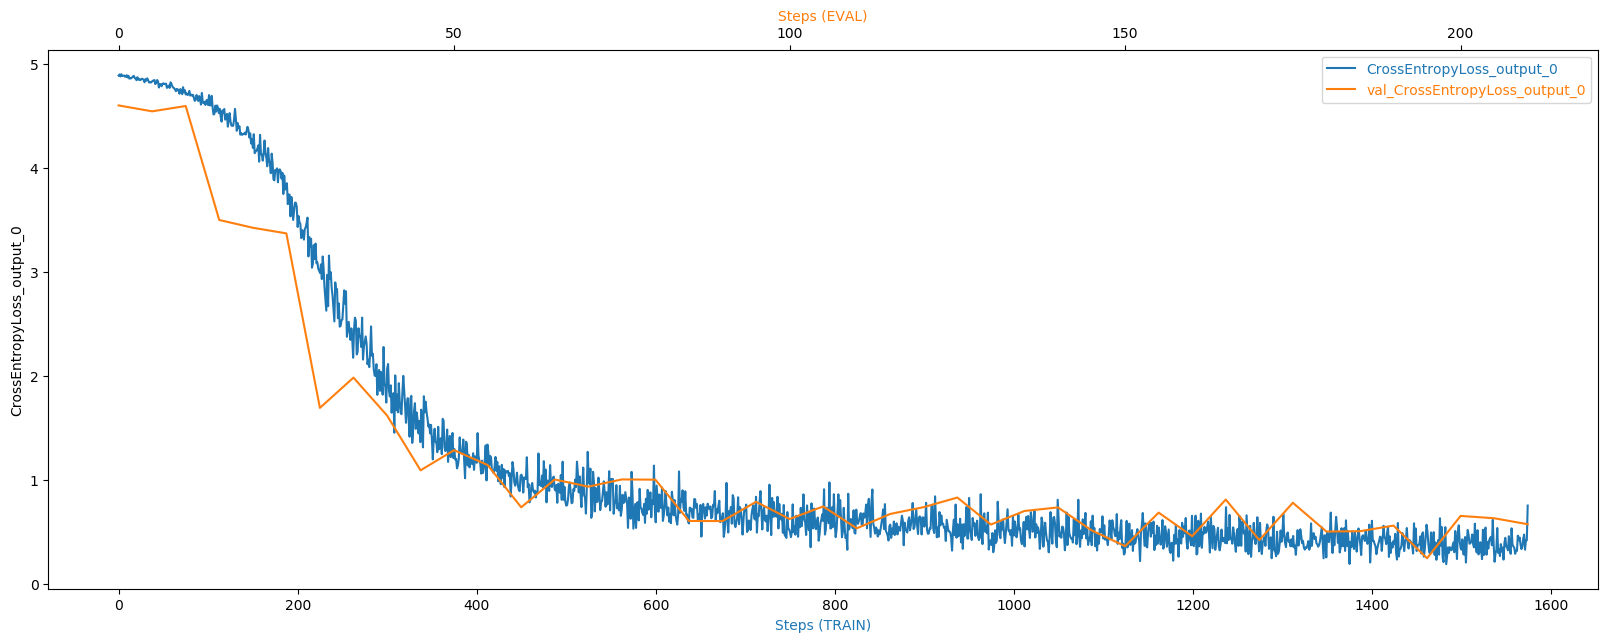

In [35]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot


def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(20, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("completed TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()
plot_tensor(trial, "CrossEntropyLoss_output_0")

In [36]:
rule_output_path = estimator.output_path + '/' + estimator.latest_training_job.job_name + "/rule-output"

In [37]:
print(f"profiler report is present in {rule_output_path}")

profiler report is present in s3://sagemaker-us-east-1-880024414046/models/image_model/dogImage-model-training-2023-04-09-03-52-50-348/rule-output


In [38]:
! aws s3 ls {rule_output_path} --recursive

2023-04-09 04:10:08     415997 models/image_model/dogImage-model-training-2023-04-09-03-52-50-348/rule-output/ProfilerReport/profiler-output/profiler-report.html
2023-04-09 04:10:07     270648 models/image_model/dogImage-model-training-2023-04-09-03-52-50-348/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2023-04-09 04:10:03        192 models/image_model/dogImage-model-training-2023-04-09-03-52-50-348/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2023-04-09 04:10:03      17175 models/image_model/dogImage-model-training-2023-04-09-03-52-50-348/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2023-04-09 04:10:03       2365 models/image_model/dogImage-model-training-2023-04-09-03-52-50-348/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2023-04-09 04:10:03        329 models/image_model/dogImage-model-training-2023-04-09-03-52-50-348/rule-output/ProfilerReport/profiler-output/profiler-r

In [39]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-880024414046/models/image_model/dogImage-model-training-2023-04-09-03-52-50-348/rule-output/ProfilerReport/profiler-output/profiler-reports/LoadBalancing.json to ProfilerReport/profiler-output/profiler-reports/LoadBalancing.json
download: s3://sagemaker-us-east-1-880024414046/models/image_model/dogImage-model-training-2023-04-09-03-52-50-348/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json to ProfilerReport/profiler-output/profiler-reports/Dataloader.json
download: s3://sagemaker-us-east-1-880024414046/models/image_model/dogImage-model-training-2023-04-09-03-52-50-348/rule-output/ProfilerReport/profiler-output/profiler-reports/MaxInitializationTime.json to ProfilerReport/profiler-output/profiler-reports/MaxInitializationTime.json
download: s3://sagemaker-us-east-1-880024414046/models/image_model/dogImage-model-training-2023-04-09-03-52-50-348/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json to P

In [40]:
import os

#folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]
print(profiler_report_name)

ProfilerReport


In [41]:
# TODO: Plot a debugging output.
import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [ ]:
# TODO: Display the profiler output

## Model Deploying

In [43]:
# TODO: Deploy your model to an endpoint

#predictor=estimator.deploy()
predictor=estimator.deploy(initial_instance_count=1, instance_type="ml.g4dn.xlarge") # TODO: Add your deployment configuration like instance type and number of instances

INFO:sagemaker:Creating model with name: dogImage-model-training-2023-04-09-04-33-14-919
INFO:sagemaker:Creating endpoint-config with name dogImage-model-training-2023-04-09-04-33-14-919
INFO:sagemaker:Creating endpoint with name dogImage-model-training-2023-04-09-04-33-14-919


---------!

Breed:  033.Bouvier_des_flandres


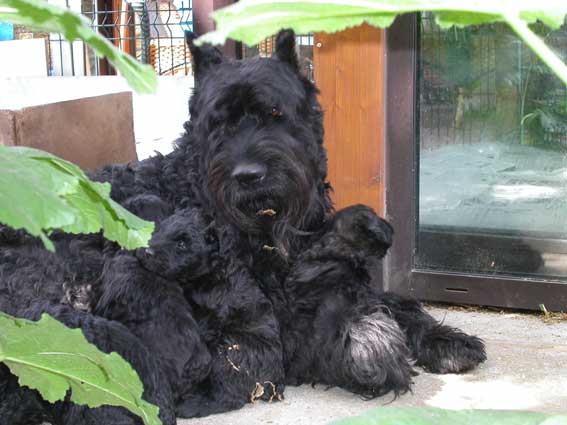

In [48]:
import os
import numpy as np
import random
from PIL import Image
# TODO: Your code to load and preprocess image to send to endpoint for prediction

data_dir = '../dogImages/test'



# Select a random image :)
file_handles = os.listdir(data_dir)
random_breed = random.choice(file_handles)
file_handles_breed = os.listdir(f"{data_dir}/{random_breed}")
random_img = random.choice(file_handles_breed)

print("Breed: ", random_breed)
image = Image.open(f"{data_dir}/{random_breed}/{random_img}")
image

In [49]:
file_handles_breed


['Bouvier_des_flandres_02339.jpg',
 'Bouvier_des_flandres_02304.jpg',
 'Bouvier_des_flandres_02355.jpg',
 'Bouvier_des_flandres_02328.jpg',
 'Bouvier_des_flandres_02305.jpg']

In [50]:
np.asarray(image).shape

(425, 567, 3)

In [51]:
np.asarray(image).transpose().shape

(3, 567, 425)

In [52]:
np.expand_dims(np.asarray(image).transpose(), axis=0).shape

(1, 3, 567, 425)

In [53]:

def process_image(image):    
    image = image.convert('RGB')
    data_transform = transforms.Compose(
        [transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])]
    )

    return data_transform(image)[:3,:,:].unsqueeze(0).numpy()

img_processed = process_image(image)

# TODO: Run an prediction on the endpoint
response = predictor.predict(img_processed)
print("Prediction result with processing:")
print(np.argmax(response[0]) + 1)
print("Breed: ", random_breed)

Prediction result with processing:
43
Breed:  033.Bouvier_des_flandres


In [54]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()

INFO:sagemaker:Deleting endpoint configuration with name: dogImage-model-training-2023-04-09-04-33-14-919
INFO:sagemaker:Deleting endpoint with name: dogImage-model-training-2023-04-09-04-33-14-919
